In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

Importare 'Completo.csv'

In [2]:
df_1 = pd.read_csv('Ultimate2.csv')
eu1 = pd.read_csv('eu_countries.csv')
Average_working = pd.read_csv('annual-working-hours-per-worker.csv')
Average_working = Average_working.groupby('Entity', as_index=False).mean()
comp = pd.read_csv('Completo.csv')

In [3]:
df_1= df_1.rename(columns={'new_value':'Indice di Povertá'})

In [4]:
eu = pd.merge(eu1,df_1, left_on='name', right_on='Country')

In [5]:
eu = eu.rename(columns={'Value': 'Suicide Rate'})

Lasciare cosi

In [6]:
df_2 = pd.merge(df_1, Average_working, left_on='Country', right_on='Entity')

In [7]:
Average_working = Average_working.drop(['Unnamed: 0', 'Year'],axis=1)

In [8]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [9]:
df_1 = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [10]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [11]:
global_temp_country_clear = global_temp_country[global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's Temperatura Media for each country

countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())


In [12]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
#f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
#sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
#Text = ax.set(xlabel='Temperatura Media', title='Average land temperature in countries')

In [13]:
temp = pd.DataFrame(data={'Temperature':mean_temp_bar, 'Country':countries_bar})

In [14]:
temp = temp.drop(241)

In [15]:
df_temp = pd.merge(df_1, temp, on='Country')

In [16]:
df_temp= df_temp.rename(columns={'Temperature':'Temperatura Media', 'Tasso di suicidi':'Tasso di Suicidi'})

OK!!

In [17]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df_temp[['Value','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Indice di Povertá'
       , 'Temperatura Media']].corr()
corr.style.background_gradient(cmap=cmap).set_precision(2)
#4
#Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship through a shaky linear rule.
#5
#Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship through a fuzzy-firm linear rule.
#6
#Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

C:\Users\Federico\AppData\Local\Temp/ipykernel_10636/1404917178.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap=cmap).set_precision(2)


,Value,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Indice di Povertá,Temperatura Media
Value,1.00,-0.07,-0.06,0.08,-0.19,0.06,-0.02,0.09,-0.27
Happiness Score,-0.07,1.00,0.79,0.72,0.77,0.57,0.42,-0.52,-0.40
Economy (GDP per Capita),-0.06,0.79,1.00,0.68,0.83,0.35,0.33,-0.69,-0.46
Family,0.08,0.72,0.68,1.00,0.62,0.43,0.19,-0.52,-0.45
Health (Life Expectancy),-0.19,0.77,0.83,0.62,1.00,0.35,0.25,-0.56,-0.53
Freedom,0.06,0.57,0.35,0.43,0.35,1.00,0.49,-0.22,-0.10
Trust (Government Corruption),-0.02,0.42,0.33,0.19,0.25,0.49,1.00,-0.09,-0.12
Indice di Povertá,0.09,-0.52,-0.69,-0.52,-0.56,-0.22,-0.09,1.00,0.33
Temperatura Media,-0.27,-0.40,-0.46,-0.45,-0.53,-0.10,-0.12,0.33,1.00


In [18]:
eu = eu.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

In [19]:
eu1.columns

Index(['Unnamed: 0', 'name'], dtype='object')

In [20]:
eu1 = pd.merge(eu, temp, on ='Country')

In [21]:
df_temp=df_temp.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio di Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá'})

In [22]:
df_temp[['Tasso di Suicidi','Temperatura Media', 'Country']]

,Tasso di Suicidi,Temperatura Media,Country
0,9.9600,6.992051,Switzerland
1,11.2975,1.405065,Iceland
2,10.3750,0.095804,Norway
3,13.8750,1.244742,Finland
4,10.7225,-5.216659,Canada
...,...,...,...
134,8.1650,22.347911,Tanzania
135,5.9575,14.045007,Afghanistan
136,15.2650,26.871783,Togo
137,2.0050,17.917549,Syria


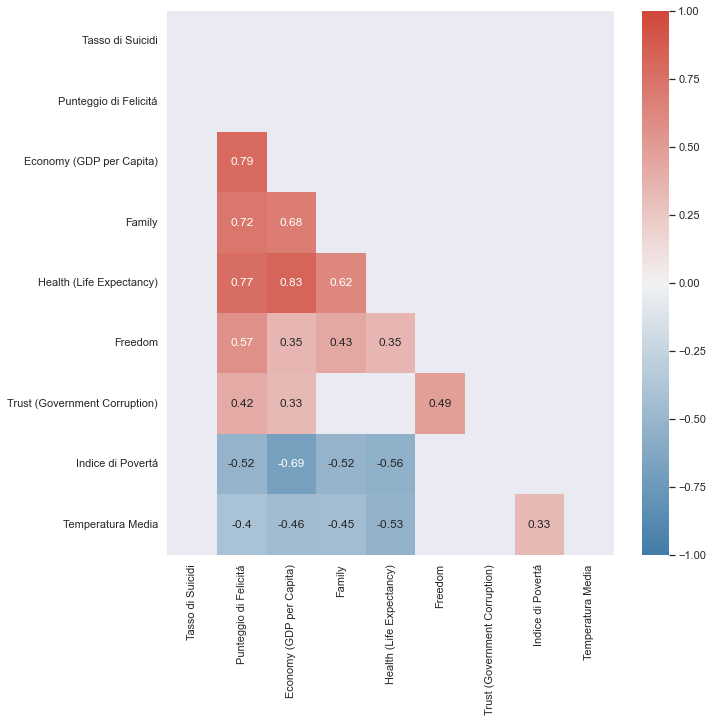

In [23]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = df_temp[['Tasso di Suicidi','Punteggio di Felicitá', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Indice di Povertá'
       ,'Temperatura Media']].corr().round(2)
cmap = sns.diverging_palette(240, 15, as_cmap=True)
matrix = matrix[abs(matrix) >= 0.3]
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,linecolor='white',vmax=1,annot=True, vmin=-1, cmap=cmap, mask=mask)
plt.show()

In [24]:
eu = pd.merge(eu,temp, on='Country')

In [25]:
eu.columns

Index(['name', 'Country', 'Suicide Rate', 'Lower_value', 'Upper_value',
       'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Happiness Rank', 'Temperature'],
      dtype='object')

In [26]:
eu= eu.rename(columns={'Temperature':'Temperatura Media', 'Suicide Rate':'Tasso di Suicidi'})

<AxesSubplot:>

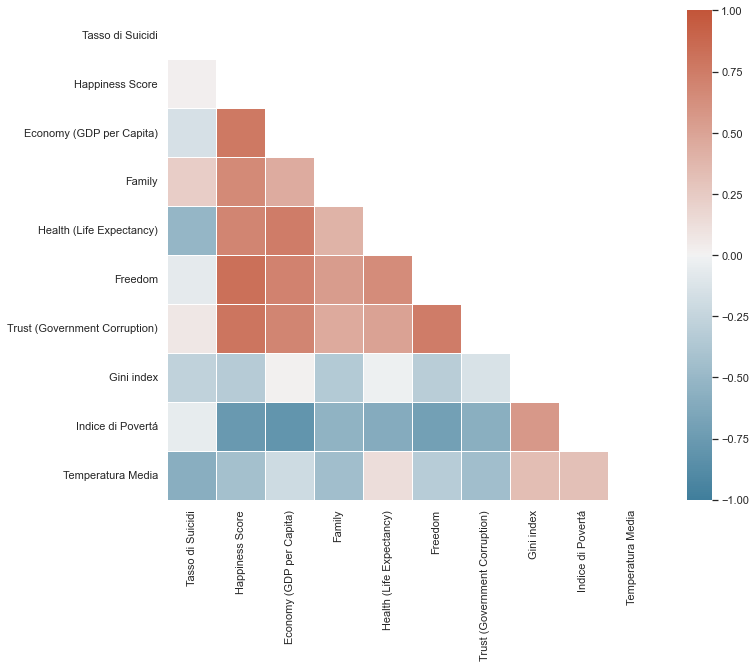

In [27]:
from string import ascii_letters

sns.set_theme(style="white")

# Compute the correlation matrix
corr = eu[['Tasso di Suicidi','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Gini index', 'Indice di Povertá'
       , 'Temperatura Media']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

Ancora qualche passsaggio

In [28]:
df_1 = df_1.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio di Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá'})

In [29]:
df_1.columns

Index(['Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Punteggio di Felicitá', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Posizione Classifica di Felicitá'],
      dtype='object')

In [30]:
df_3 = df_1[df_1["Indice di Povertá"]<200]

In [31]:
df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']

C:\Users\Federico\AppData\Local\Temp/ipykernel_10636/4278908533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']


NO

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


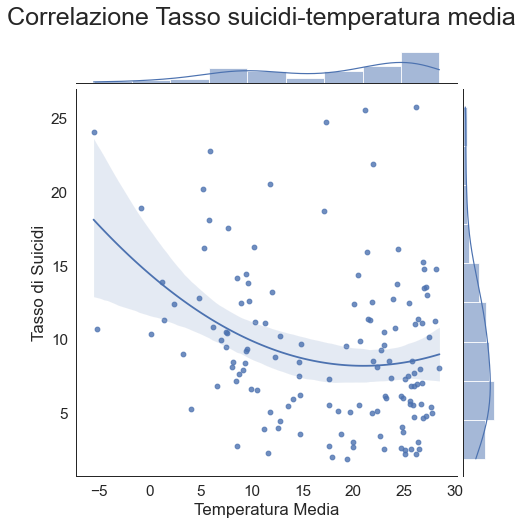

In [32]:
x= df_temp['Temperatura Media']
y = df_temp['Tasso di Suicidi']
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
rel = sns.jointplot(x, y, kind='reg', height=7,ratio=10, order=2)
rel.fig.suptitle('Correlazione Tasso suicidi-temperatura media', size=25, y=1.05, fontweight=5)
plt.show()

In [310]:
#df_3= df_3.rename(columns={'Happiness Rank':'Posizione Classifica di Felicitá', 'Average annual working hours per worker':'Ore medie lavorative per abitante'})

In [33]:
df_2 = df_2.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio di Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá', 'Average annual working hours per worker':'Ore medie lavorative per abitante'})

In [34]:
df_2.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Country', 'Tasso di Suicidi',
       'Lower_value', 'Upper_value', 'Unnamed: 0.1.1', 'Punteggio di Felicitá',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Posizione Classifica di Felicitá', 'Entity', 'Unnamed: 0_y', 'Year',
       'Ore medie lavorative per abitante'],
      dtype='object')

SI

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


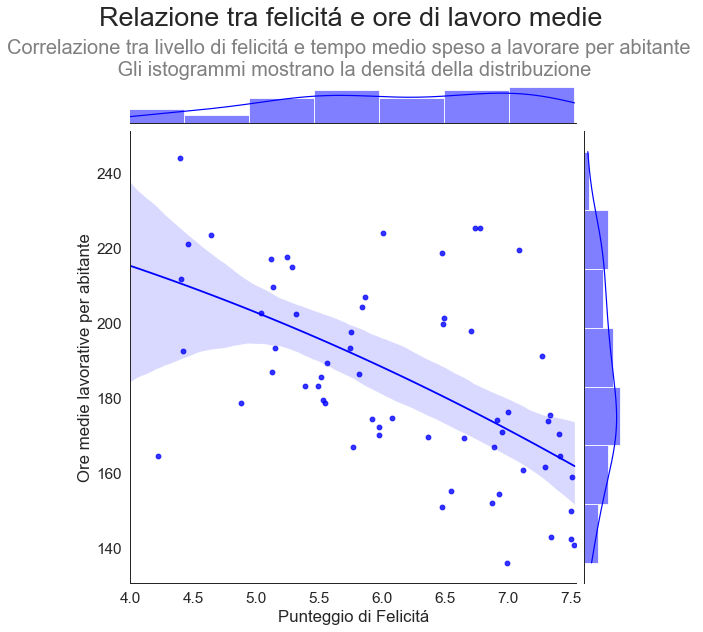

In [35]:
#Correlazione Felicitá/Tempo speso a lavorare mondo
x = df_2['Punteggio di Felicitá']
y = df_2['Ore medie lavorative per abitante']/10
z = df_2['Economy (GDP per Capita)']
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
sns.jointplot(x, y, kind='reg', height=8,ratio=10, order=2, xlim=(4,7.54), color='blue')
plt.suptitle('Correlazione tra livello di felicitá e tempo medio speso a lavorare per abitante \n Gli istogrammi mostrano la densitá della distribuzione', fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'},fontsize=20, y=1.05, color='grey')
plt.title('Relazione tra felicitá e ore di lavoro medie', size=27, y=1.22, fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'} ,fontweight=5)
plt.show()

In [36]:
df_3['Indice di Ricchezza'] = (1/df_3['Indice di Povertá'])*100

C:\Users\Federico\AppData\Local\Temp/ipykernel_10636/2513513305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Indice di Ricchezza'] = (1/df_3['Indice di Povertá'])*100


OK

In [37]:
df_3.columns

Index(['Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Punteggio di Felicitá', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Posizione Classifica di Felicitá', 'Varianza',
       'Indice di Ricchezza'],
      dtype='object')

Text(1.0, 1.35, 'Relazione tra felicitá e indice di ricchezza')

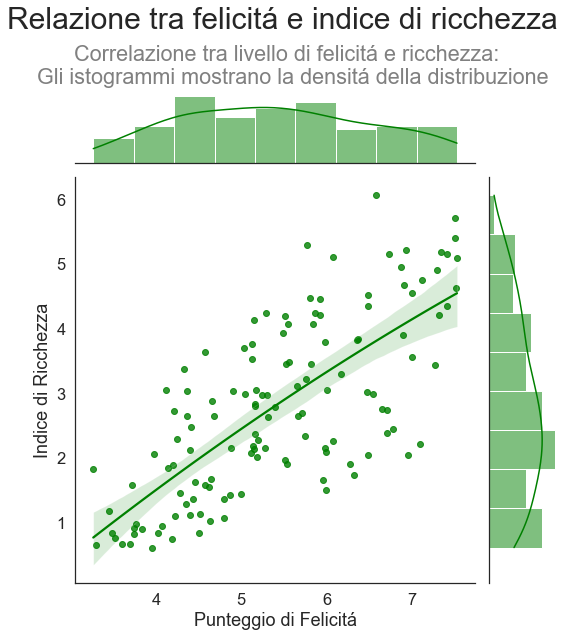

In [38]:
#Correlazione felicitá/benessere economico mondo
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)
rel = sns.jointplot(data=df_3, x= "Punteggio di Felicitá", y="Indice di Ricchezza", kind='reg', order=2, height=8, color='green')
rel.fig.suptitle('Relazione Felicitá-Povertá', size=25, y=1.07,x=0.45, fontweight=5, horizontalalignment='center')
plt.suptitle('Correlazione tra livello di felicitá e ricchezza: \n Gli istogrammi mostrano la densitá della distribuzione',fontdict= {'fontsize':30,'verticalalignment': 'baseline','horizontalalignment': 'right'}, y=1.05, color='grey')
plt.title(label='Relazione tra felicitá e indice di ricchezza', size=30, y=1.35, loc='right', fontweight=5)

Forse

In [39]:
df_3['Intervallo di confidenza'] = df_3['Upper_value'] - df_3['Lower_value']

C:\Users\Federico\AppData\Local\Temp/ipykernel_10636/1063677011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Intervallo di confidenza'] = df_3['Upper_value'] - df_3['Lower_value']


In [40]:
df_3.columns

Index(['Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Punteggio di Felicitá', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Posizione Classifica di Felicitá', 'Varianza',
       'Indice di Ricchezza', 'Intervallo di confidenza'],
      dtype='object')

Forse

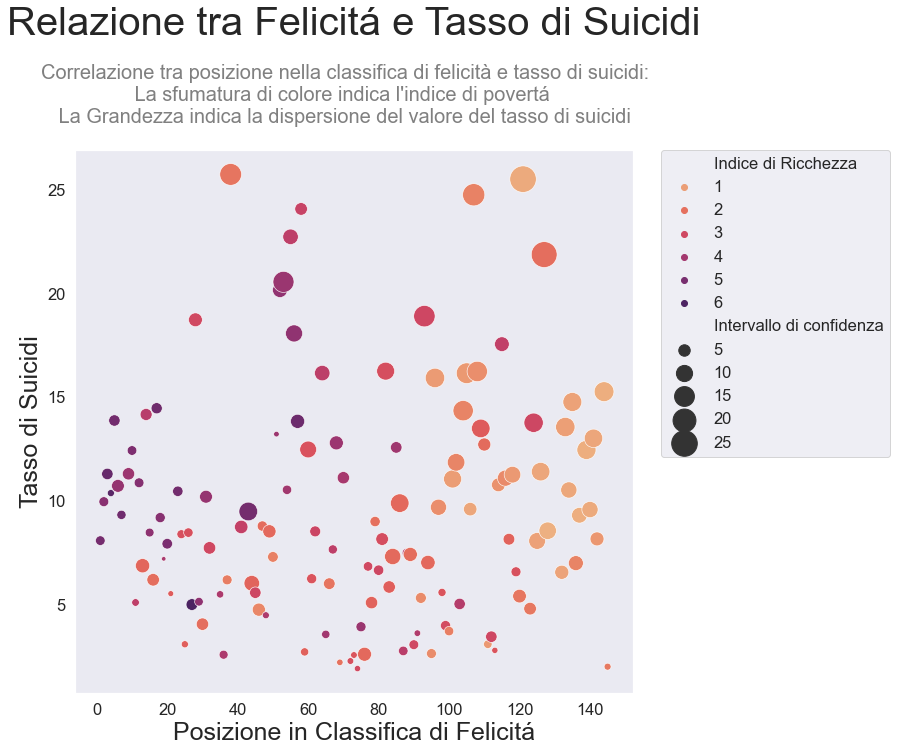

In [44]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data=df_3, x='Posizione Classifica di Felicitá', y='Tasso di Suicidi',size='Intervallo di confidenza', legend=True, sizes=(20,700), hue='Indice di Ricchezza', palette=sns.color_palette("flare", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Posizione in Classifica di Felicitá',fontsize=25)
ax.set_ylabel('Tasso di Suicidi',fontsize=25)
plt.title(label='Relazione tra Felicitá e Tasso di Suicidi', size=40, y=1.2, loc='center', fontweight=15)
plt.suptitle("Correlazione tra posizione nella classifica di felicità e tasso di suicidi:\n La sfumatura di colore indica l'indice di povertá  \n La Grandezza indica la dispersione del valore del tasso di suicidi ",fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'center'},fontweight=15, size=20, y=1, color='grey')

plt.show()

In [45]:
df_1['Varianza'] = df_1['Upper_value'] - df_1['Lower_value']
df_1 = df_1.rename(columns={'Value':'Tasso di Suicidi','Varianza':'Varianza Tasso di Suicidi'})

In [46]:
df_1.columns

Index(['Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Punteggio di Felicitá', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Posizione Classifica di Felicitá',
       'Varianza Tasso di Suicidi'],
      dtype='object')

In [47]:
df_1 = df_1[df_1["Indice di Povertá"]<200]

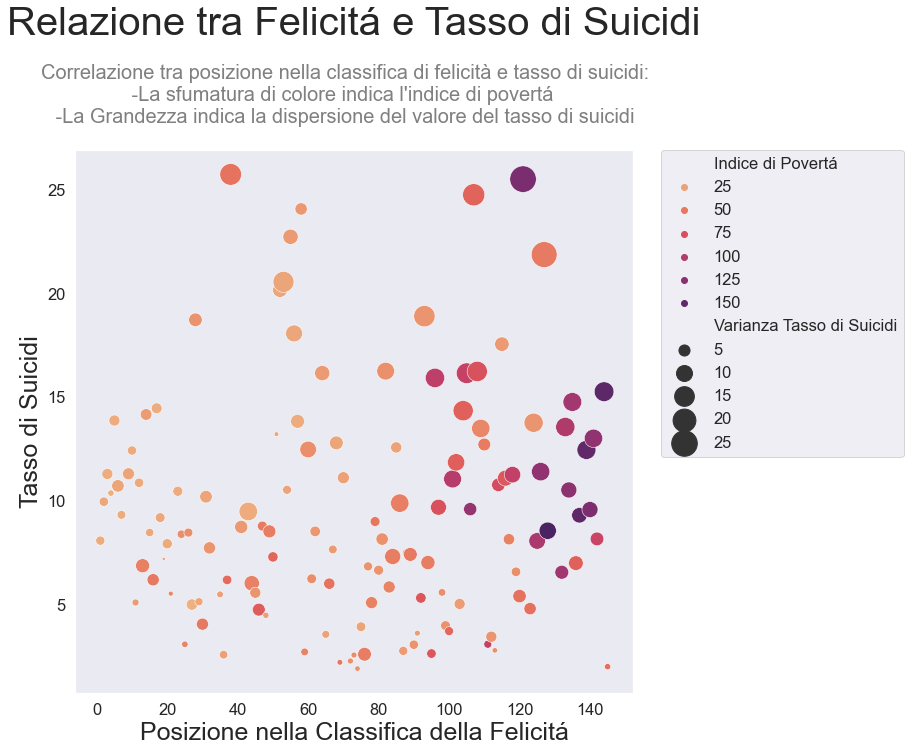

In [49]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data=df_1, x='Posizione Classifica di Felicitá', y='Tasso di Suicidi',size='Varianza Tasso di Suicidi',
sizes=(10,700), hue='Indice di Povertá', palette=sns.color_palette("flare", as_cmap=True),legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Posizione nella Classifica della Felicitá',fontsize=25)
ax.set_ylabel('Tasso di Suicidi',fontsize=25)
plt.title(label='Relazione tra Felicitá e Tasso di Suicidi', size=40, y=1.2, loc='center', fontweight=5)
plt.suptitle("Correlazione tra posizione nella classifica di felicità e tasso di suicidi:\n -La sfumatura di colore indica l'indice di povertá  \n -La Grandezza indica la dispersione del valore del tasso di suicidi ",fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'},fontweight=15, size=20, y=1, color='grey')
plt.show()

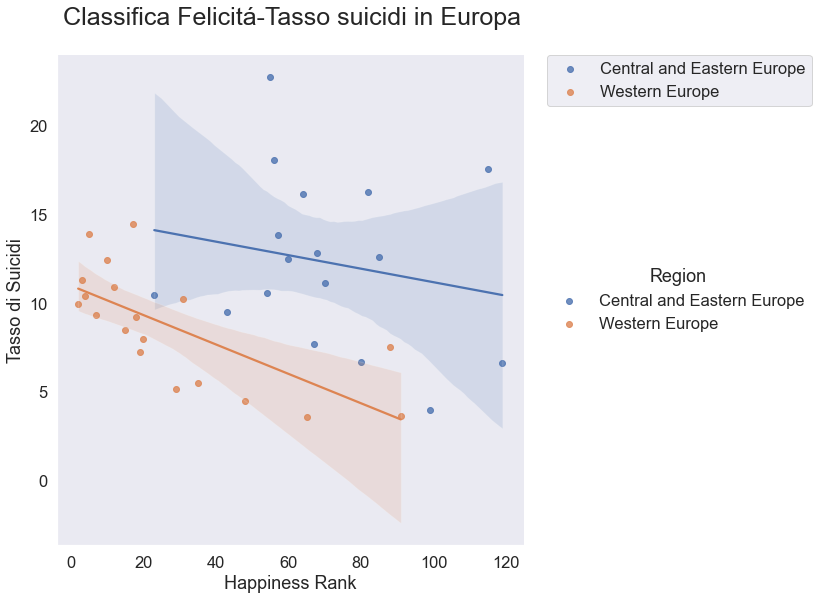

In [50]:
#Correlazione Suicidi/Gdp Europa Occidentale
sns.set_style("dark")
sns.set_context(font_scale=2)
rel = sns.lmplot(data=eu, x='Happiness Rank', y='Tasso di Suicidi', hue='Region',height=8)
rel.fig.suptitle('Classifica Felicitá-Tasso suicidi in Europa', size=25, y=1.05, fontweight=5, x=0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [54]:
alt.Chart(df_1).mark_circle(size = 100).encode(
    x='Posizione Classifica di Felicitá',
    y='Tasso di Suicidi',
    size='Tasso di Suicidi',
    tooltip=['Posizione Classifica di Felicitá', 'Tasso di Suicidi', 'Indice di Povertá','Country','Region'],
    color=alt.Color('Region:N')
).interactive()

alt.Chart(...)